In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## 1. Iris 데이터셋을 활용해 클래스별 변수 평균 차이를 검정

### 1. 구조 확인

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. 기술 통계량 산출

In [4]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [5]:
iris.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [6]:
iris.groupby('species').agg(['min', 'max']).reset_index()

species sepal_length      sepal_width      petal_length       \
                       min  max         min  max          min  max   
0      setosa          4.3  5.8         2.3  4.4          1.0  1.9   
1  versicolor          4.9  7.0         2.0  3.4          3.0  5.1   
2   virginica          4.9  7.9         2.2  3.8          4.5  6.9   

  petal_width       
          min  max  
0         0.1  0.6  
1         1.0  1.8  
2         1.4  2.5

In [7]:
iris.groupby('species').quantile([0.25, 0.5, 0.75]) # type: ignore

sepal_length  sepal_width  petal_length  petal_width
species                                                              
setosa     0.25         4.800        3.200         1.400          0.2
           0.50         5.000        3.400         1.500          0.2
           0.75         5.200        3.675         1.575          0.3
versicolor 0.25         5.600        2.525         4.000          1.2
           0.50         5.900        2.800         4.350          1.3
           0.75         6.300        3.000         4.600          1.5
virginica  0.25         6.225        2.800         5.100          1.8
           0.50         6.500        3.000         5.550          2.0
           0.75         6.900        3.175         5.875          2.3

### 3. 시각화

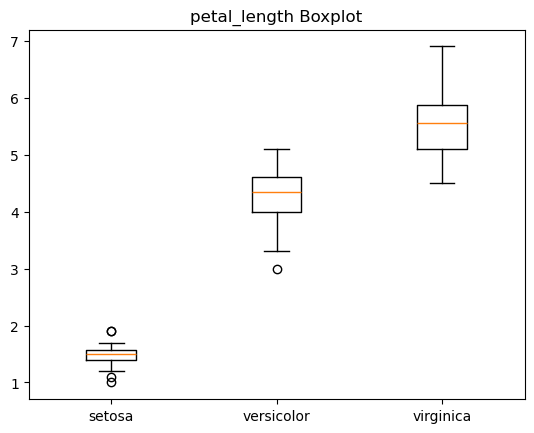

In [8]:
plt.boxplot([    
    iris[iris['species'] == 'setosa']['petal_length'],
    iris[iris['species'] == 'versicolor']['petal_length'],
    iris[iris['species'] == 'virginica']['petal_length']],)

plt.title('petal_length Boxplot')
plt.xticks([1, 2, 3], ['setosa', 'versicolor', 'virginica'])
plt.show()

- 평균이 setosa, versicolor, virginica 순으로 커진다. 
- setosa는 Q3-Q1 길이가 짧다.
- setosa는 outlier까지 포함해도 max가 다른 품종의 min 보다 작다.

### 4. 정규성 검정

모든 종의 모든 변수에 다음과 같은 가설검정을 실시한다.

$ H_0: $ 데이터가 정규 분포를 따른다. \
$ H_1: $ 데이터가 정규 분포를 따르지 않는다.

In [9]:
for specie in iris.species.unique():
    print('=' * 10 + f'{specie=}' + '=' * 10)

    for col_name in iris[iris['species'] == specie].columns[:-1]:
        p = stats.shapiro(iris[iris['species'] == specie][col_name]).pvalue
        print(f'{col_name}\t{p=:.5f}')

==========specie='setosa'==========
sepal_length	p=0.45951
sepal_width	p=0.27153
petal_length	p=0.05481
petal_width	p=0.00000
==========specie='versicolor'==========
sepal_length	p=0.46474
sepal_width	p=0.33800
petal_length	p=0.15848
petal_width	p=0.02728
==========specie='virginica'==========
sepal_length	p=0.25831
sepal_width	p=0.18090
petal_length	p=0.10978
petal_width	p=0.08695


versicolor의 petal width와 setosa의 petal width가 정규성을 띄지 않는 것 같다.

### 5. 등분산성 검정

모든 변수에 다음과 같은 가설검정을 실시한다.

$ H_0: $ 서로다른 종 3개의 특정 변수의 분산은 같다. \
$ H_1: $ 적어도 하나의 종의 특정 변수의 분산은 다르다.

In [10]:
for col_name in iris.columns[:-1]:
    result = stats.levene(iris[iris['species'] == 'setosa'][col_name],
                          iris[iris['species'] == 'versicolor'][col_name],
                          iris[iris['species'] == 'virginica'][col_name])
    print(f'{col_name}\t{result.pvalue:.5f}')

sepal_length	0.00226
sepal_width	0.55552
petal_length	0.00000
petal_width	0.00000


sepal_width 는 등분산을 만족하는것 같고, 나머지 값들은 등분산을 만족하지 못하는거 같다.

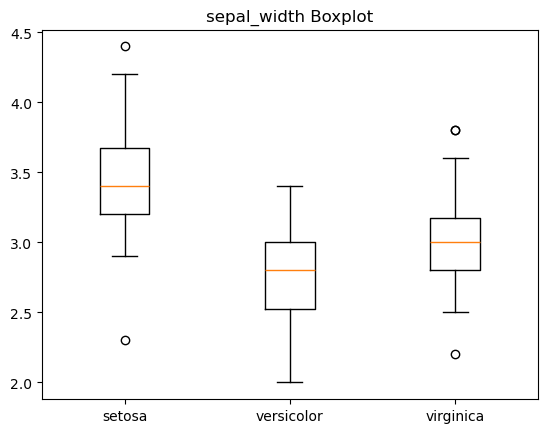

In [11]:
plt.boxplot([    
    iris[iris['species'] == 'setosa']['sepal_width'],
    iris[iris['species'] == 'versicolor']['sepal_width'],
    iris[iris['species'] == 'virginica']['sepal_width']],)

plt.title('sepal_width Boxplot')
plt.xticks([1, 2, 3], ['setosa', 'versicolor', 'virginica'])
plt.show()

sepal_width 의 Boxplot과 위에서 구한 petal_length의 Boxplot을 비교하니 일리가 있는거 같다.

### 6. 가설 수립

어떤 그룹의 Petal Length가 유의하게 긴지/짧은지 알아보고싶다.

그러므로 가설을 setosa, versicolor, virginica 의 Petal Length 모평균을 각각 $\mu_1, \mu_2, \mu_3$로 두고 가설을 수립하면

$H_0: \mu_1 = \mu_2 = \mu_3$ \
$H_1:$ 최소한 하나의 $\mu_n$은 다르다.

### 7. ANOVA 실행

In [12]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [13]:
lmodel = ols('petal_length ~ C(species)', data=iris).fit()
print(anova_lm(lmodel, typ=1))

               df    sum_sq     mean_sq            F        PR(>F)
C(species)    2.0  437.1028  218.551400  1180.161182  2.856777e-91
Residual    147.0   27.2226    0.185188          NaN           NaN


F값이 1180, p값이 2.856777e-91. 그러므로 귀무가설을 기각한다.\
즉, 세 종의 petal_length는 적어도 하나가 다르다.

### 8. Tukey

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(iris['petal_length'], iris['species'], alpha=0.05)
print(posthoc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


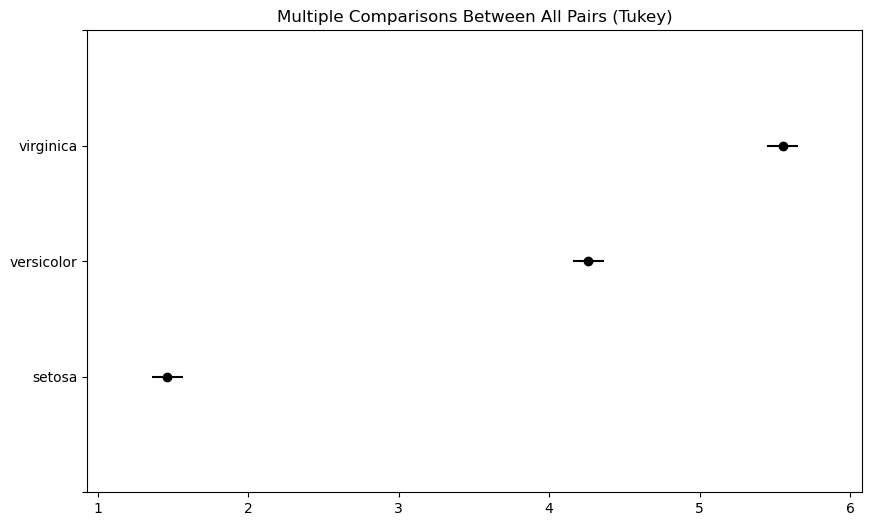

In [15]:
fig = posthoc.plot_simultaneous()

Tukey 결과, 세 품종의 petal_length의 평균은 모든 쌍에서 유의미한 차이를 보였고, \
오름차순으로 정렬하면 setosa, versicolor, virginica 순이였다.

### 9. 결과 요약

Boxplot의 결과로 우리는 setosa가 다른 두 종과 확연히 분리될 정도의 작은 petal_length를 가진다는것과 대략적인 평균의 차이를 알았다. 또한 ANOVA를 통해서 세 종의 품종중 적어도 하나는 유의미한 차이를 가진다는것과, tukey 결과에서 세 쌍의 품종 비교에서 모두 귀무가설을 기각하는것을 보았다.

결론: 오름차순으로 setosa, versicolor, virginica 가 통게적으로 유의미한 차이의 petal_length평균의 차이를 보였다.

### A. 참고 문헌

["파이썬으로 사후검정(Post Hoc Analysis)". Taeyoon Kim. Mar 17, 18. https://partrita.github.io/posts/post-hoc-analysis/](https://partrita.github.io/posts/post-hoc-analysis/)

27기 신입 세션 수업자료

## 2. 실제 신용카드 사기 데이터셋을 활용해 클래스 불균형 상황에서 분류 모델을 학습

### 1. 데이터 로드 및 기본 탐색

In [16]:
original_creditcard_df = pd.read_csv('./creditcard.csv')
original_creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
original_creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
original_creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
zero_count = sum(original_creditcard_df['Class'] == 0)
one_count = sum(original_creditcard_df['Class'] == 1)
one_rate = one_count / len(original_creditcard_df)

print(f'{zero_count=}, {one_count=}, {one_rate=}')

zero_count=284315, one_count=492, one_rate=0.001727485630620034


Class==1 인 값들이 0.2%정도로, 이상 거래가 정상 거래보다 극도로 작은 데이터임을 알 수 있다.

### 2. 샘플링

In [20]:
scam_cc_df = original_creditcard_df[original_creditcard_df['Class'] == 1]
normal_cc_df = original_creditcard_df[original_creditcard_df['Class'] == 0].sample(10000, random_state=42)

cc_df = pd.concat([scam_cc_df, normal_cc_df])

In [21]:
len(cc_df)

10492

### 3.표준화

In [22]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cc_df['Amount_Scaled'] = std_scaler.fit_transform(cc_df[['Amount']])[:,0]

In [23]:
cc_df.drop('Amount', axis=1, inplace=True)

In [27]:
X = cc_df.drop('Class', axis=1)
y = cc_df[['Class']]

### 4. 학습 데이터와 테스트 데이터 분할

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [42]:
print('train 비율: ', (Y_train.sum(axis=0) / len(Y_train)).values[0])
print('test 비율: ', (Y_test.sum(axis=0) / len(Y_test)).values[0])

train 비율:  0.04694388180626713
test 비율:  0.046688899475940925


train 과 test 모두 비율이 0.047 정도로 비슷한것을 알 수 있다.

### 5. SMOTE 적용

비록 우리가 많은 데이터중 정상 데이터를 대거 삭제하여 데이터셋의 불균형 문제를 어느정도 해결하긴 했지만, 아직도 이상거래는 전체 거래의 4.7% 정도로, 전체 거래에 비해 현저히 낮은 비율을 가지고 있다고 할 수 있다. 

이런 경우 recall, 즉 사기거래중 실제로 사기 거래로 분류된 거래의 비율이 내려갈 수 있다. 데이터셋의 뷸균형 문제는 많은 데이터를 삭제하는 방면으로도 할 수 있지만, 이상거래가 의미 있는 수준의 비율을 가질 정도로 정상 데이터를 삭제하면 데이터셋의 너무 많은 부분을 삭제할 것 같다. 
 
다른 방법은 오버 샘플링을 통해 이상거래와 비슷한 거래의 데이터를 만들어내는 것이다. 오버 셈플링 기법중 하나인 SMOTE는 우리의 상황에 도움이 될 것 같다. SMOTE를 사용해보자.

In [43]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE()

X_resampled, y_resampled = sm.fit_resample(X_train, Y_train)

print('SMOTE 전 train_X:', X_train.shape)
print('SMOTE 전 train_y:', Y_train.shape)
print('SMOTE 전 이상거래 갯수: ', Y_train.sum(axis=0).values[0])
print()
print('SMOTE 후 train_X:', X_resampled.shape)
print('SMOTE 후 train_y:', y_resampled.shape)
print('SMOTE 후 이상거래 갯수: ', y_resampled.sum(axis=0).values[0])

SMOTE 전 train_X: (8393, 30)
SMOTE 전 train_y: (8393, 1)
SMOTE 전 이상거래 갯수:  394

SMOTE 후 train_X: (15998, 30)
SMOTE 후 train_y: (15998, 1)
SMOTE 후 이상거래 갯수:  7999


### 6. 모델 학습

혹시 모르니 오버샘플링 전 데이터의 다중공산성 분석을 해보자.

<Axes: >

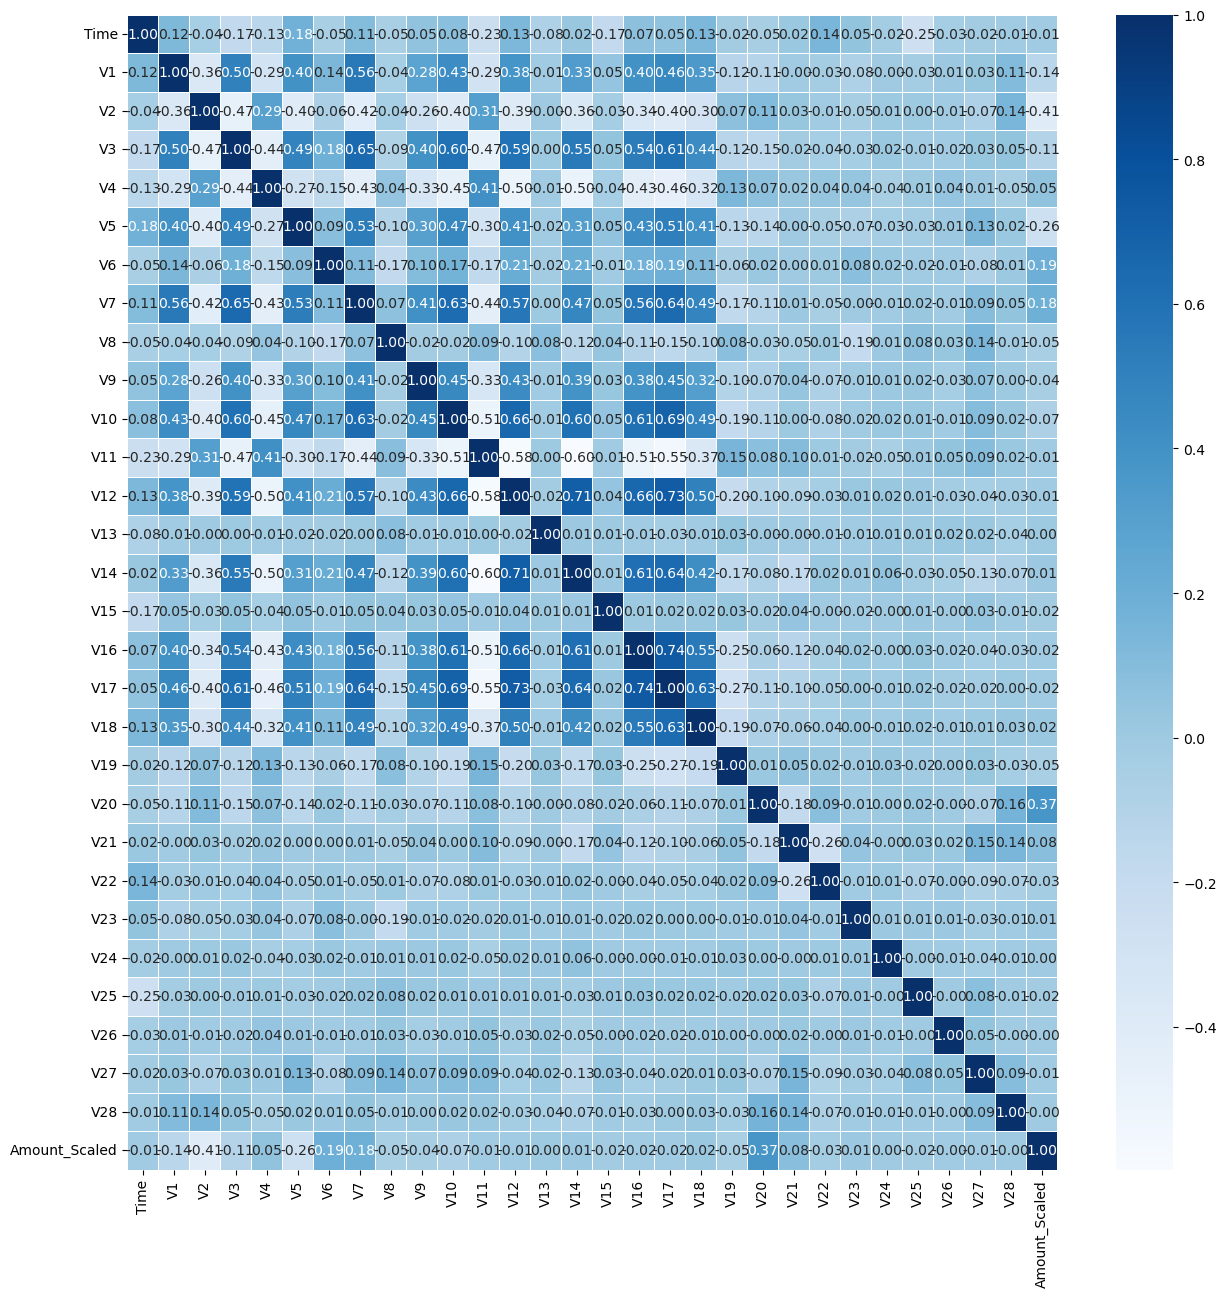

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(data = X_train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.009089,V26
1,1.015847,V24
2,1.016410,V13
3,1.022006,V15
4,1.083826,V25
5,1.131106,Time
6,1.144964,V19
7,1.154988,V27
8,1.163312,V22
9,1.193895,V28


V7이 제거를 고려할만 하지만, 이 정도면 그대로 진행해도 될 것 같다.

지도학습-분류 문제이므로, 쓸 수 있는 모델은 Logistic regression, SVM, Random Forest등이 있을 것 같다.

나는 대부분의 상황에서 안정적으로 성능을 낸다고 하는 랜덤 포레스트를 사용해서 모델을 학습시켜봐야겠다.

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score

In [81]:
clf = RandomForestClassifier(random_state=0)

In [82]:
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)

/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [83]:
print(classification_report(y_true=Y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.92      0.88      0.90        98

    accuracy                           0.99      2099
   macro avg       0.96      0.94      0.95      2099
weighted avg       0.99      0.99      0.99      2099



In [84]:
print('PR-AUC\t', average_precision_score(Y_test, clf.predict_proba(X_test)[:,1]))

PR-AUC	 0.9515593714712828


### 7. 최종 성능 평가

- recall: Class 0, Class 1 각각 1.00 0.88 로 0.8보다 높았음.
- f1: Class 0, Class 1 각각 1.00, 0.90 로 0.88보다 높았음.
- PR-AUC: 0.95로 0.9보다 높았음.

범용적으로 좋은 성능을 보여주는 random forest를 이용해서 하이퍼파라미터 튜닝, Threshold 조정을 별로 안했던것 같음 (딸칵 성공). \
처음 학습 시킬땐 max_depth=5로 제한을 걸었지만, f1-score를 만족시키지 못해 max_depth를 없앴는데 학습 시간은 2배정도로 늘어났지만 더 나아진 성능을 보여줬음.

모델은 요구하는 사양의 성능을 모두 만족하는데 성공함.

### A. 참고문헌

["Precision, Recall, F1 스코어 등의 모델 평가 방법". Soon's Blog. Jul 06, 2022. https://meme2515.github.io/machine_learning/performance_measurement/](https://meme2515.github.io/machine_learning/performance_measurement/)

27기 신입 세션 수업자료

사이킷런 공식 문서